# Przetwarzanie i analiza sygnału EKG
### Mirosław Kuźniar, nr indeksu: 248870

### Ćwiczenie 4

Celem cwiczenia jest praktyczne wypróbowanie działania filtrów
w celu wyeliminowania niepozadanych zakłócen z sygnału EKG. Prosze wybrac
rodzaj filtra do eksperymentowania, np. Butterwortha lub Czebyszewa. Do filtracji
wykorzystac gotowe funkcje z biblioteki scipy.signal. Biblioteka posiada równiez
funkcje wspomagajace projektowanie filtrów, które mozna zastosowac.

In [1]:
%matplotlib inline

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import scipy.signal as sig

a) Wczytaj sygnał ekg noise.txt i zauwaz zakłócenia nałozone na sygnał. Wykreslic
czestotliwosciowa charakterystyke amplitudowa sygnału.

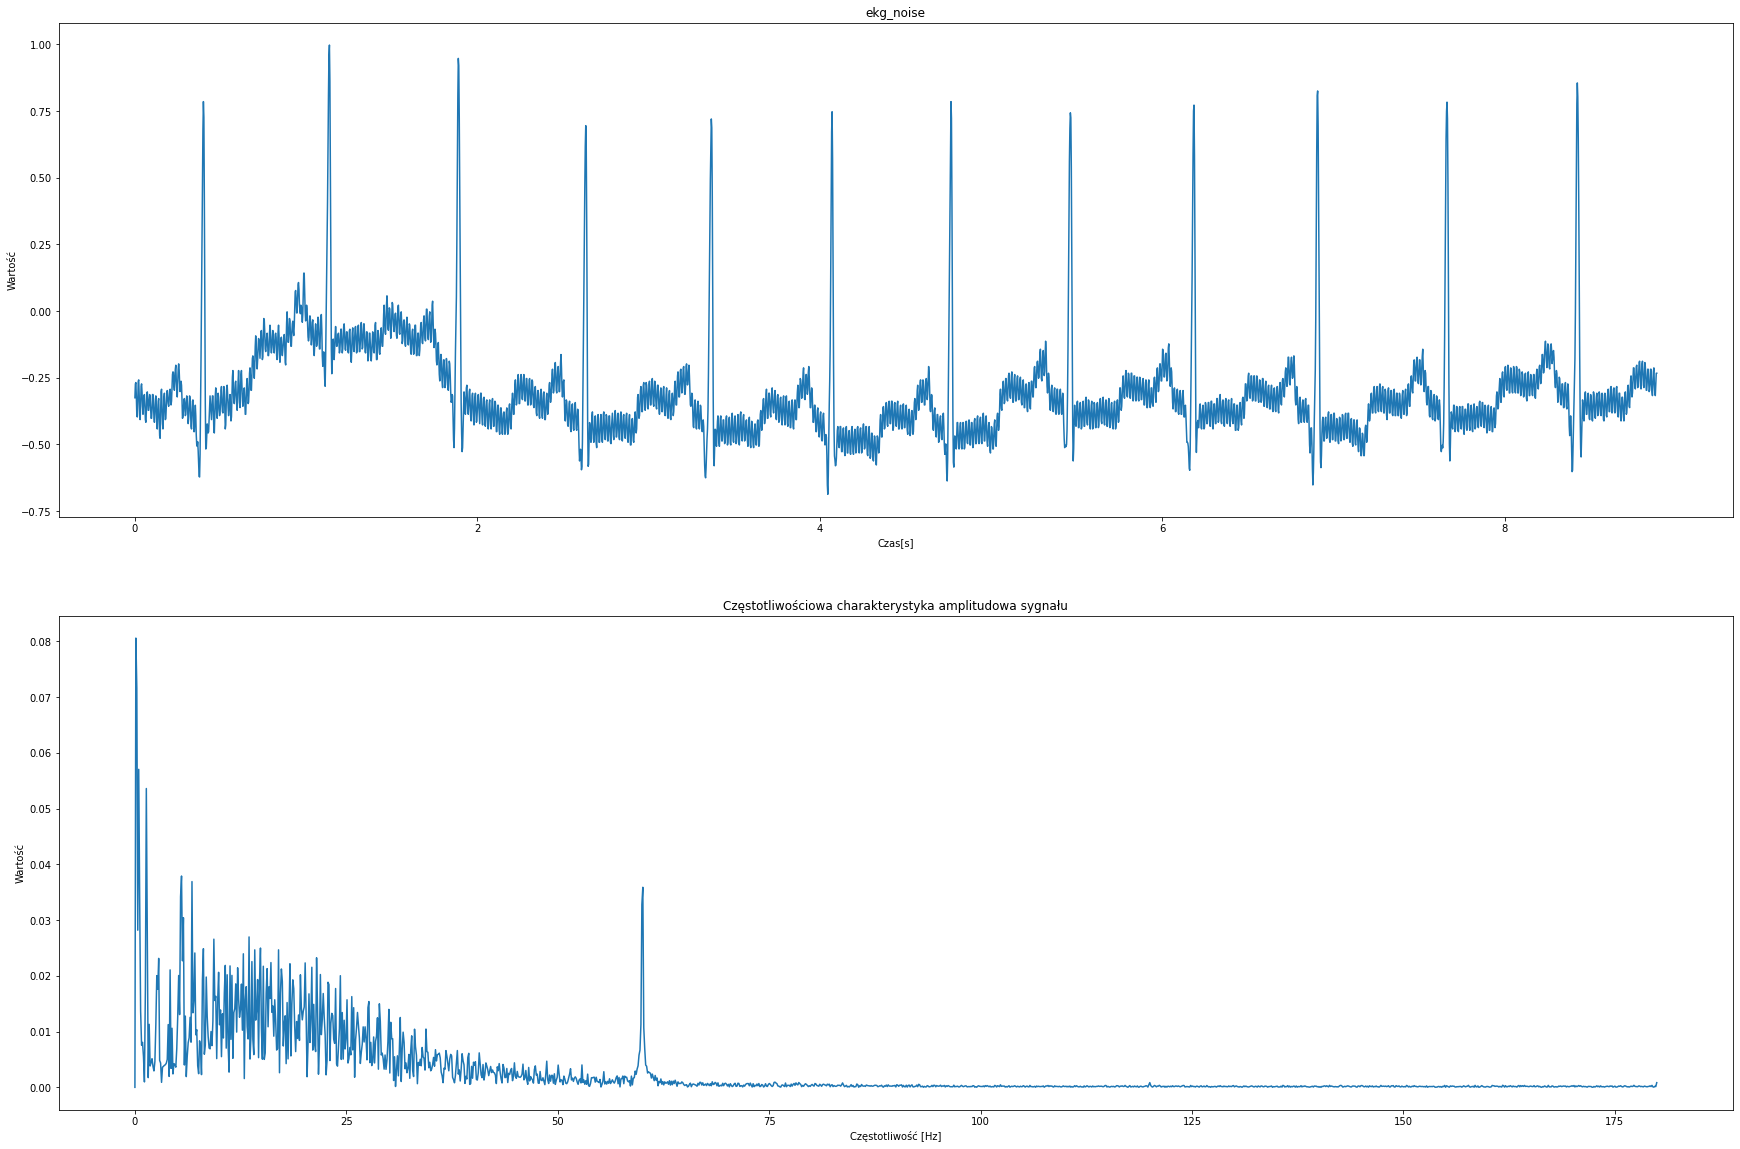

In [3]:
ekg_noise = pd.read_csv('../ekg_noise.txt', names=['Czas', 'Wartość amplitudy'], sep='\s+') # wczytanie sygnału ekg_noise z pliku
sampling_frequency_ekg_noise = 360 # ustawienie częstotliwości próbkowania
ekg_noise = ekg_noise.set_index('Czas') # ustawienie czasu jako indexu tabeli

spectrum = ekg_noise['Wartość amplitudy'] - ekg_noise['Wartość amplitudy'].mean()
spectrum = np.abs(np.fft.rfft(spectrum)) / (ekg_noise['Wartość amplitudy'].size//2)
frequency = np.fft.rfftfreq(ekg_noise.size, 1/sampling_frequency_ekg_noise) # wyznaczenie częstotliwosciowej charakterystyki amplitudowej 

plt.figure(figsize=(30,20))

plt.subplot(2, 1, 1) # wyrysowanie wykresu
plt.plot(ekg_noise)
plt.title('ekg_noise')
plt.xlabel('Czas[s]')
plt.ylabel('Wartość')

plt.subplot(2, 1, 2)
plt.plot(frequency, spectrum) # wyrysowanie wykresu
plt.title('Częstotliwościowa charakterystyka amplitudowa sygnału')
plt.xlabel('Częstotliwość [Hz]')
plt.ylabel('Wartość')
plt.show()

b) Zbadaj filtr dolnoprzepustowy o czestotliwosci granicznej 60 Hz w celu redukcji
zakłócen pochodzacych z sieci zasilajacej. Wyznacz parametry filtra. wyznacz róznice miedzy sygnałem przed i po filtracji

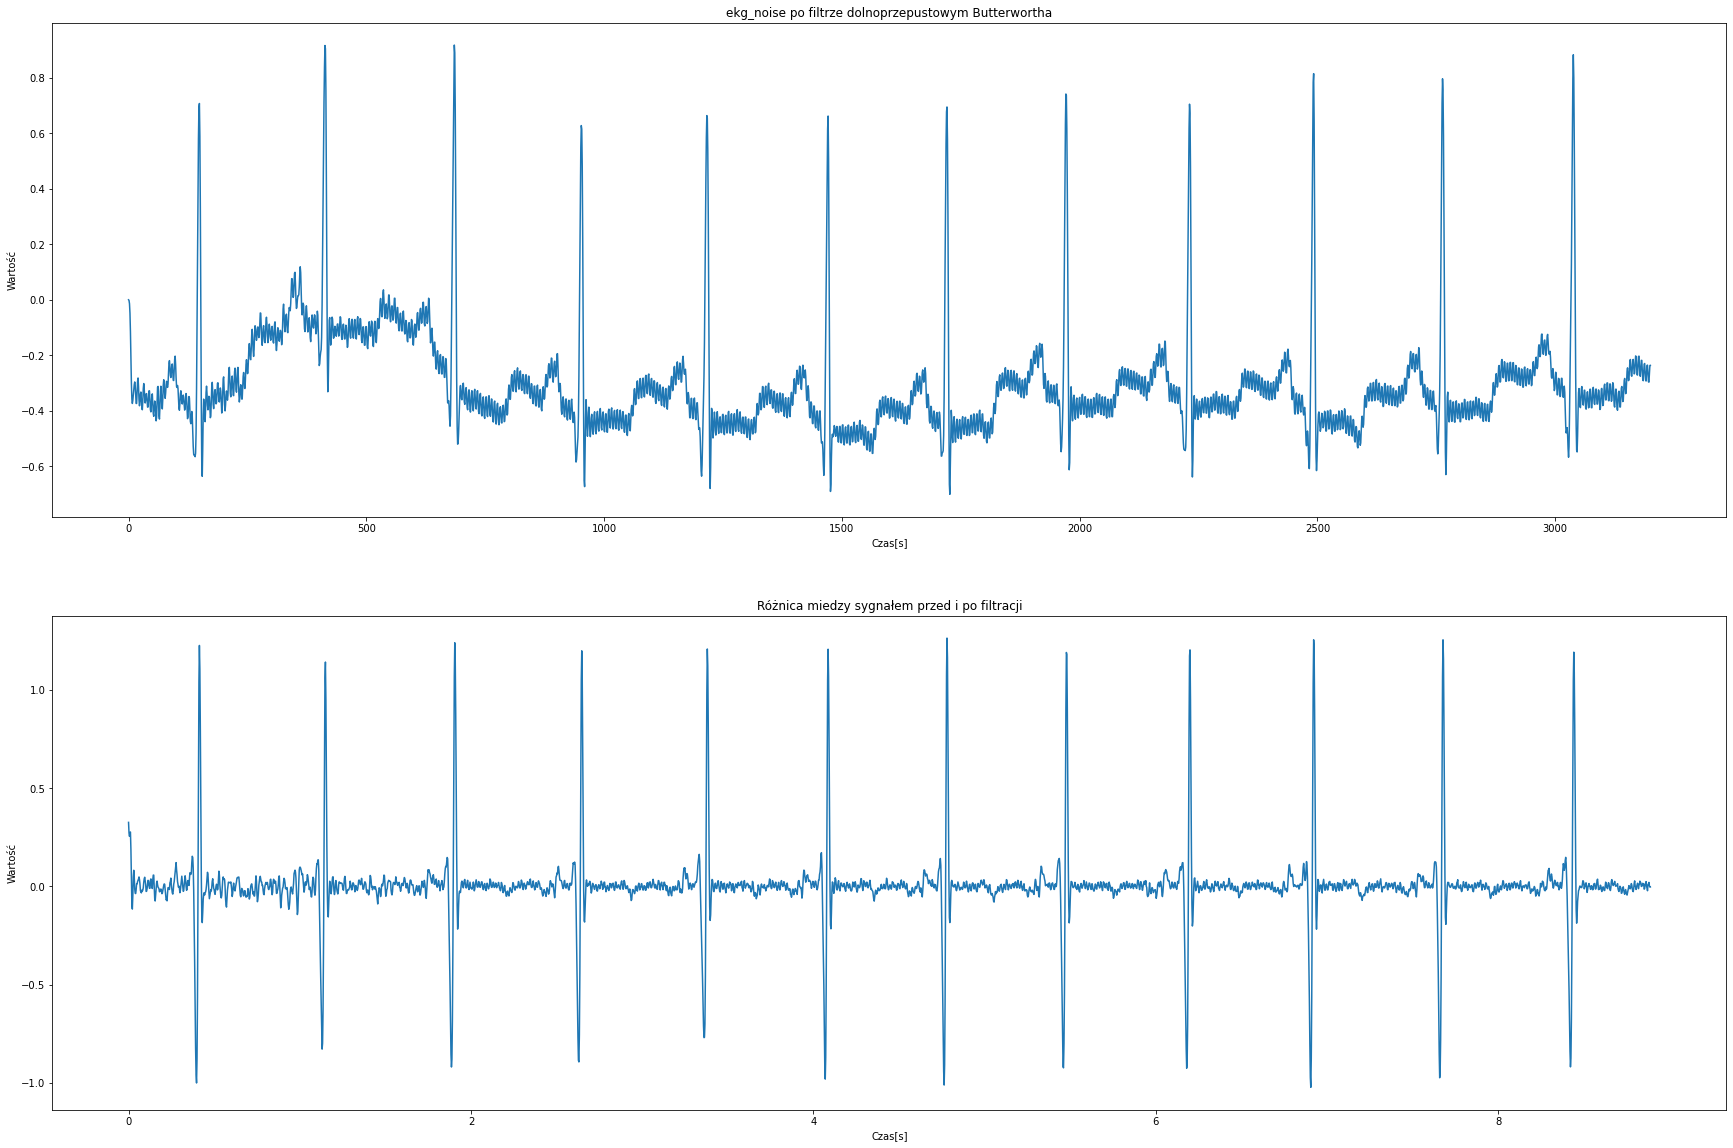

In [4]:
cutoff_frequency = 60 # ustawienie częstotliwości granicznej 

butterworth  = sig.butter(8, cutoff_frequency, 'low', fs = sampling_frequency_ekg_noise, output = 'sos') # filtr Butterwortha
filtered_sig = sig.sosfilt(butterworth, ekg_noise['Wartość amplitudy']) # przefiltrowanie sekwencji danych używając filtra IIR

plt.figure(figsize=(30,20))

plt.subplot(2, 1, 1) # wyrysowanie wykresu
plt.plot(filtered_sig)
plt.title('ekg_noise po filtrze dolnoprzepustowym Butterwortha')
plt.xlabel('Czas[s]')
plt.ylabel('Wartość')

plt.subplot(2, 1, 2) # wyrysowanie wykresu
plt.plot(filtered_sig - ekg_noise['Wartość amplitudy'])
plt.title('Różnica miedzy sygnałem przed i po filtracji')
plt.xlabel('Czas[s]')
plt.ylabel('Wartość')
plt.show()

Wykresl jego charakterystyke (zaleznosc tłumienia od czestotliwosci)

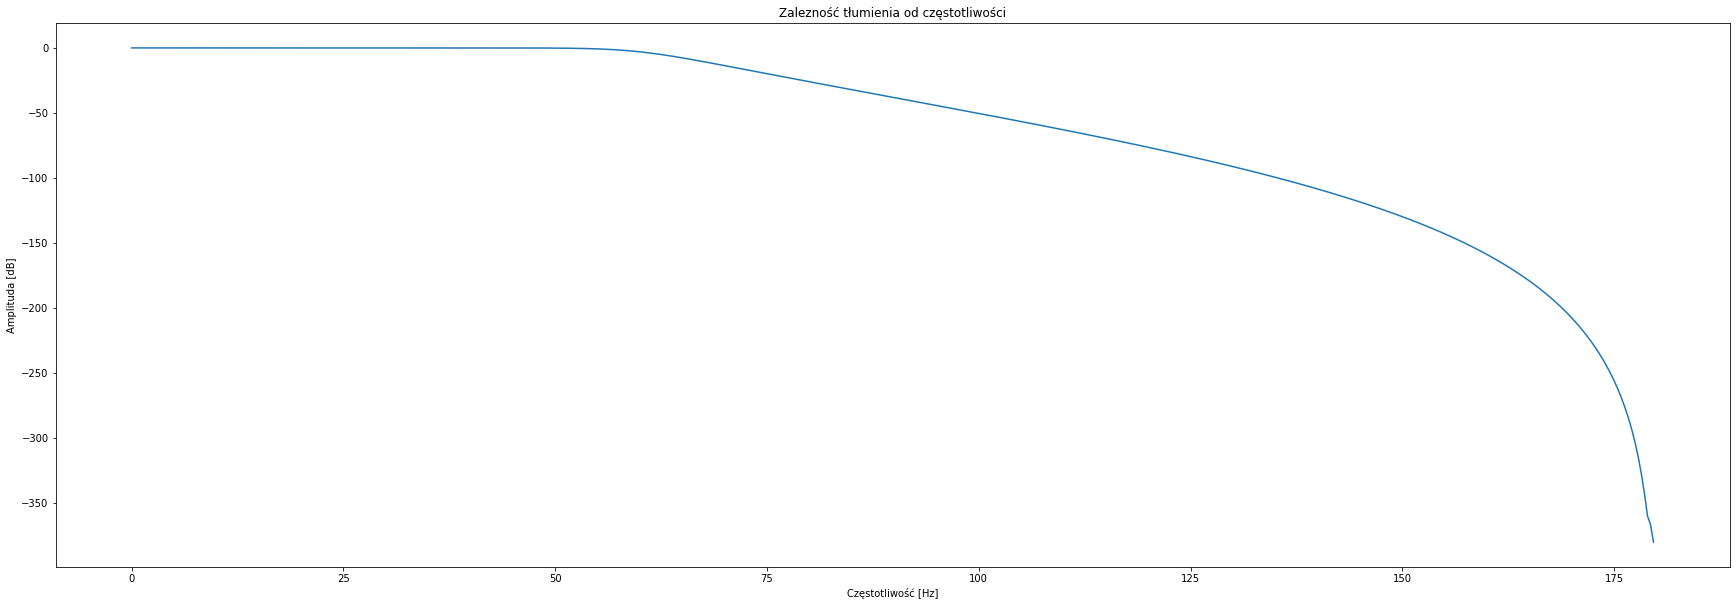

In [5]:
b,a = sig.butter(8,cutoff_frequency/(sampling_frequency_ekg_noise/2), 'low') # filtr Butterwortha
w,h = sig.freqz(b,a) # charakterystyka częstotliwościowa filtra
x = w*sampling_frequency_ekg_noise / (2*np.pi)
y = 20*np.log10(abs(h))

plt.figure(figsize=(30,10))

plt.subplot(1, 1, 1) # wyrysowanie wykresu
plt.plot(x,y)
plt.title('Zalezność tłumienia od częstotliwości')
plt.xlabel('Częstotliwość [Hz]')
plt.ylabel('Amplituda [dB]')
plt.show()

Wyznacz widmo przebiegu sygnału po filtracji. Wyznacz widmo różnicy miedzy sygnałem przed i po filtracji

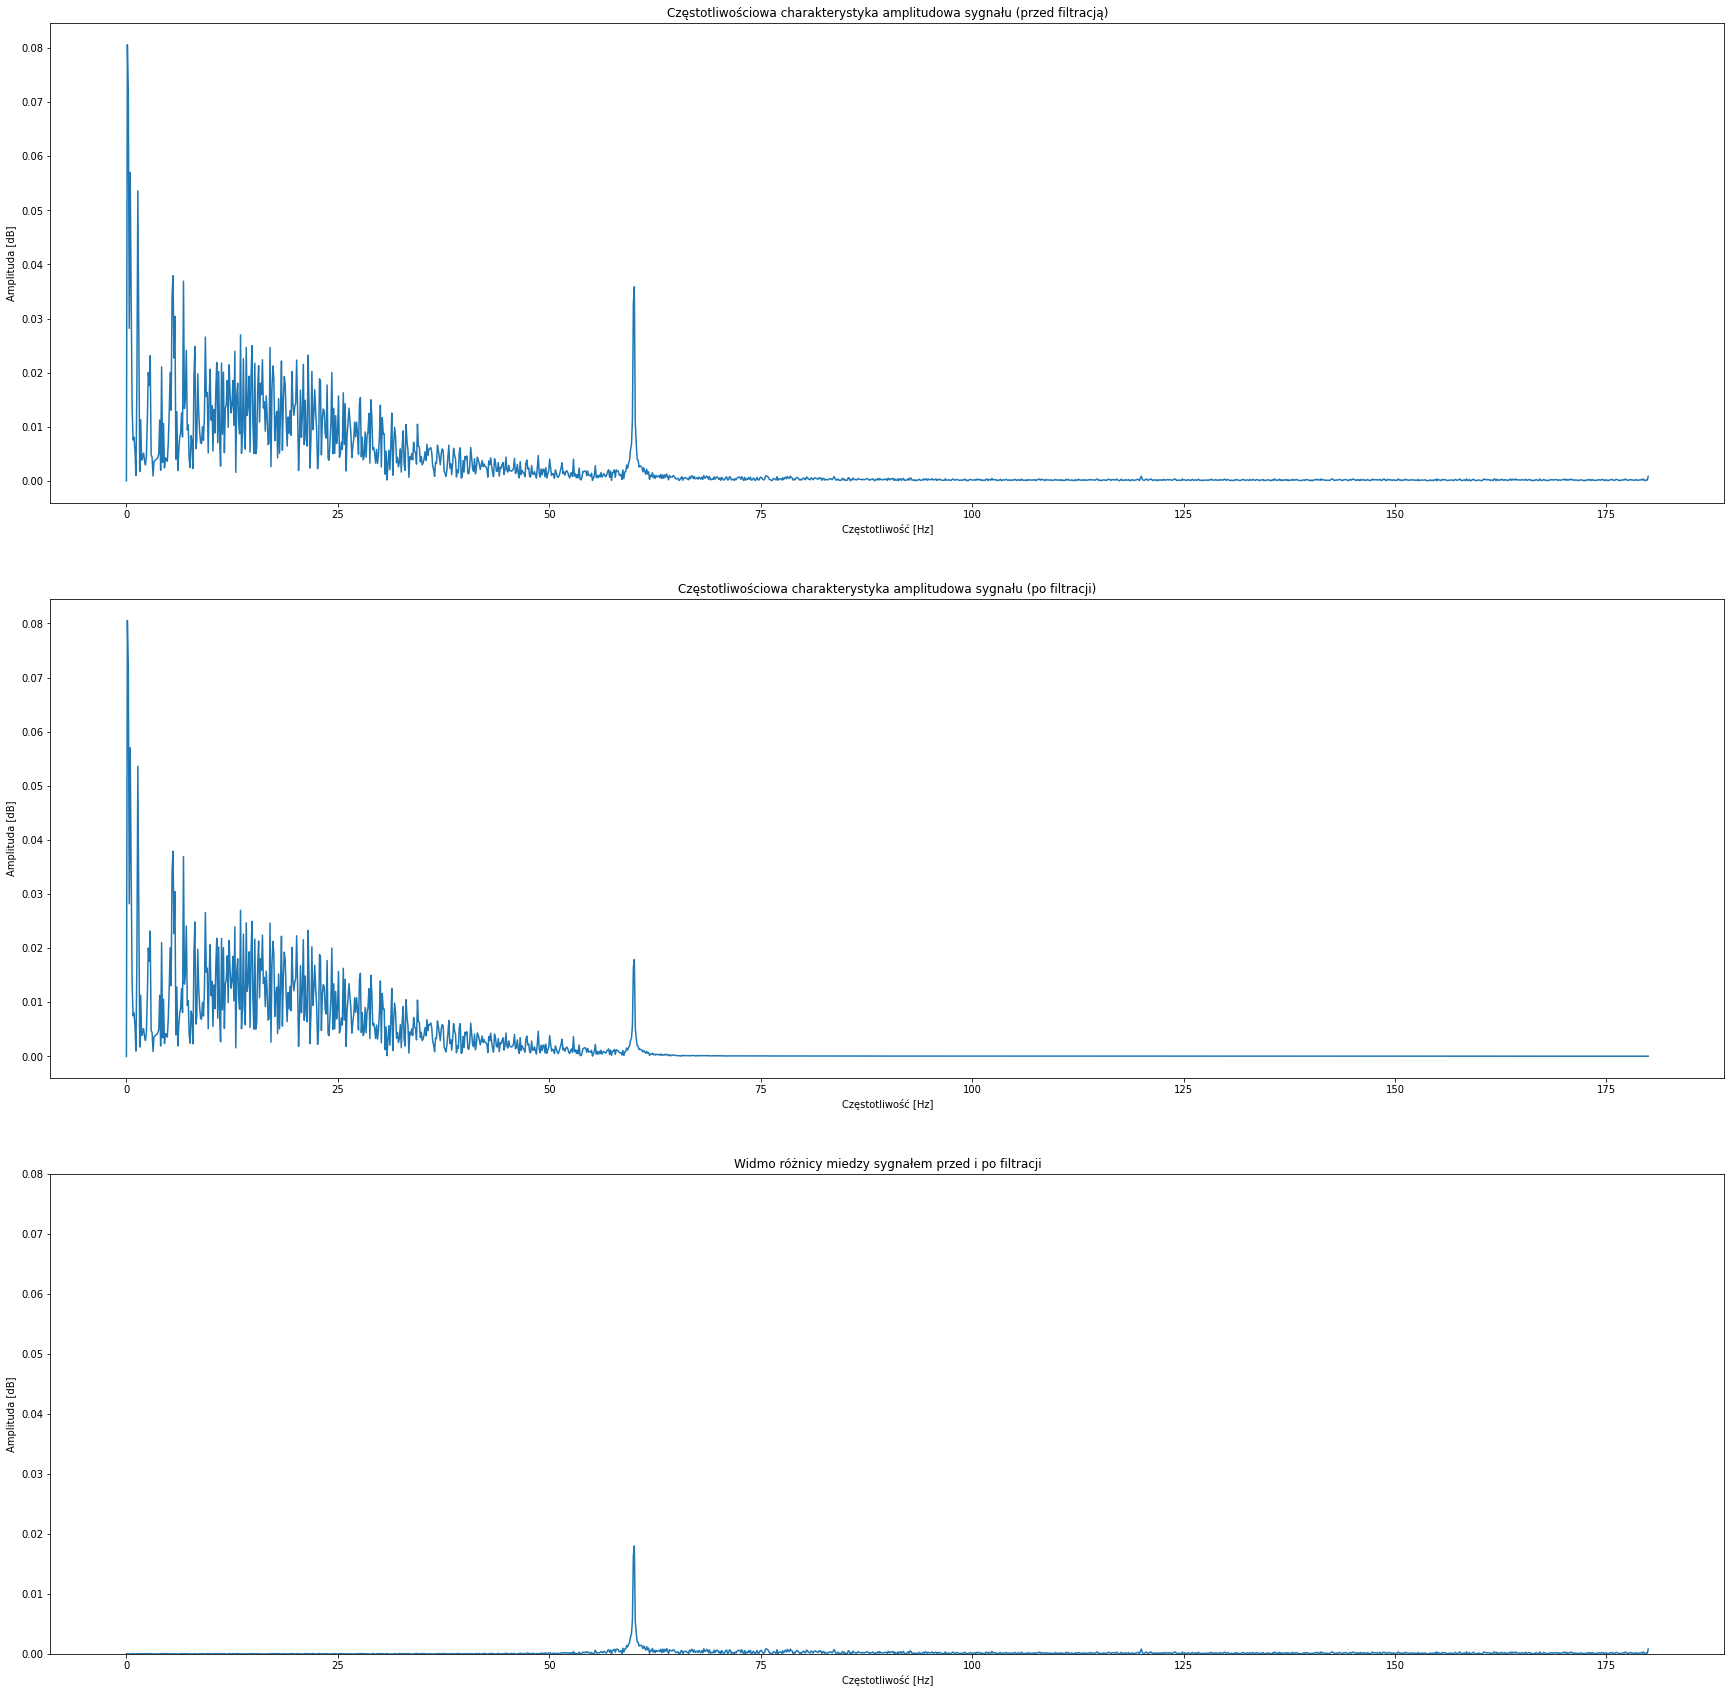

In [6]:
spectrum_60 = sig.filtfilt(b,a, ekg_noise['Wartość amplitudy']) - sig.filtfilt(b,a, ekg_noise['Wartość amplitudy']).mean() # filtr cyfrowy od przodu i od tyłu sygnału
spectrum_60 = np.abs(np.fft.rfft(spectrum_60))/(ekg_noise.size//2)

plt.figure(figsize=(30,30))

plt.subplot(3, 1, 1) # wyrysowanie wykresu
plt.plot(frequency,spectrum)
plt.title('Częstotliwościowa charakterystyka amplitudowa sygnału (przed filtracją)')
plt.xlabel('Częstotliwość [Hz]')
plt.ylabel('Amplituda [dB]')

plt.subplot(3, 1, 2) # wyrysowanie wykresu
plt.plot(frequency,spectrum_60)
plt.title('Częstotliwościowa charakterystyka amplitudowa sygnału (po filtracji)')
plt.xlabel('Częstotliwość [Hz]')
plt.ylabel('Amplituda [dB]')
 
plt.subplot(3, 1, 3) # wyrysowanie wykresu
plt.plot(frequency,spectrum - spectrum_60)
plt.ylim([0,0.08])
plt.title('Widmo różnicy miedzy sygnałem przed i po filtracji')
plt.xlabel('Częstotliwość [Hz]')
plt.ylabel('Amplituda [dB]')
plt.show()

c) Zastosuj nastepnie, do sygnału otrzymanego w punkcie 2, filtr górnoprzepustowy
o czestotliwosci granicznej 5 Hz w celu eliminacji pływania linii izoelektrycznej.
Sporzadz wykresy sygnałów jak w punkcie 2.

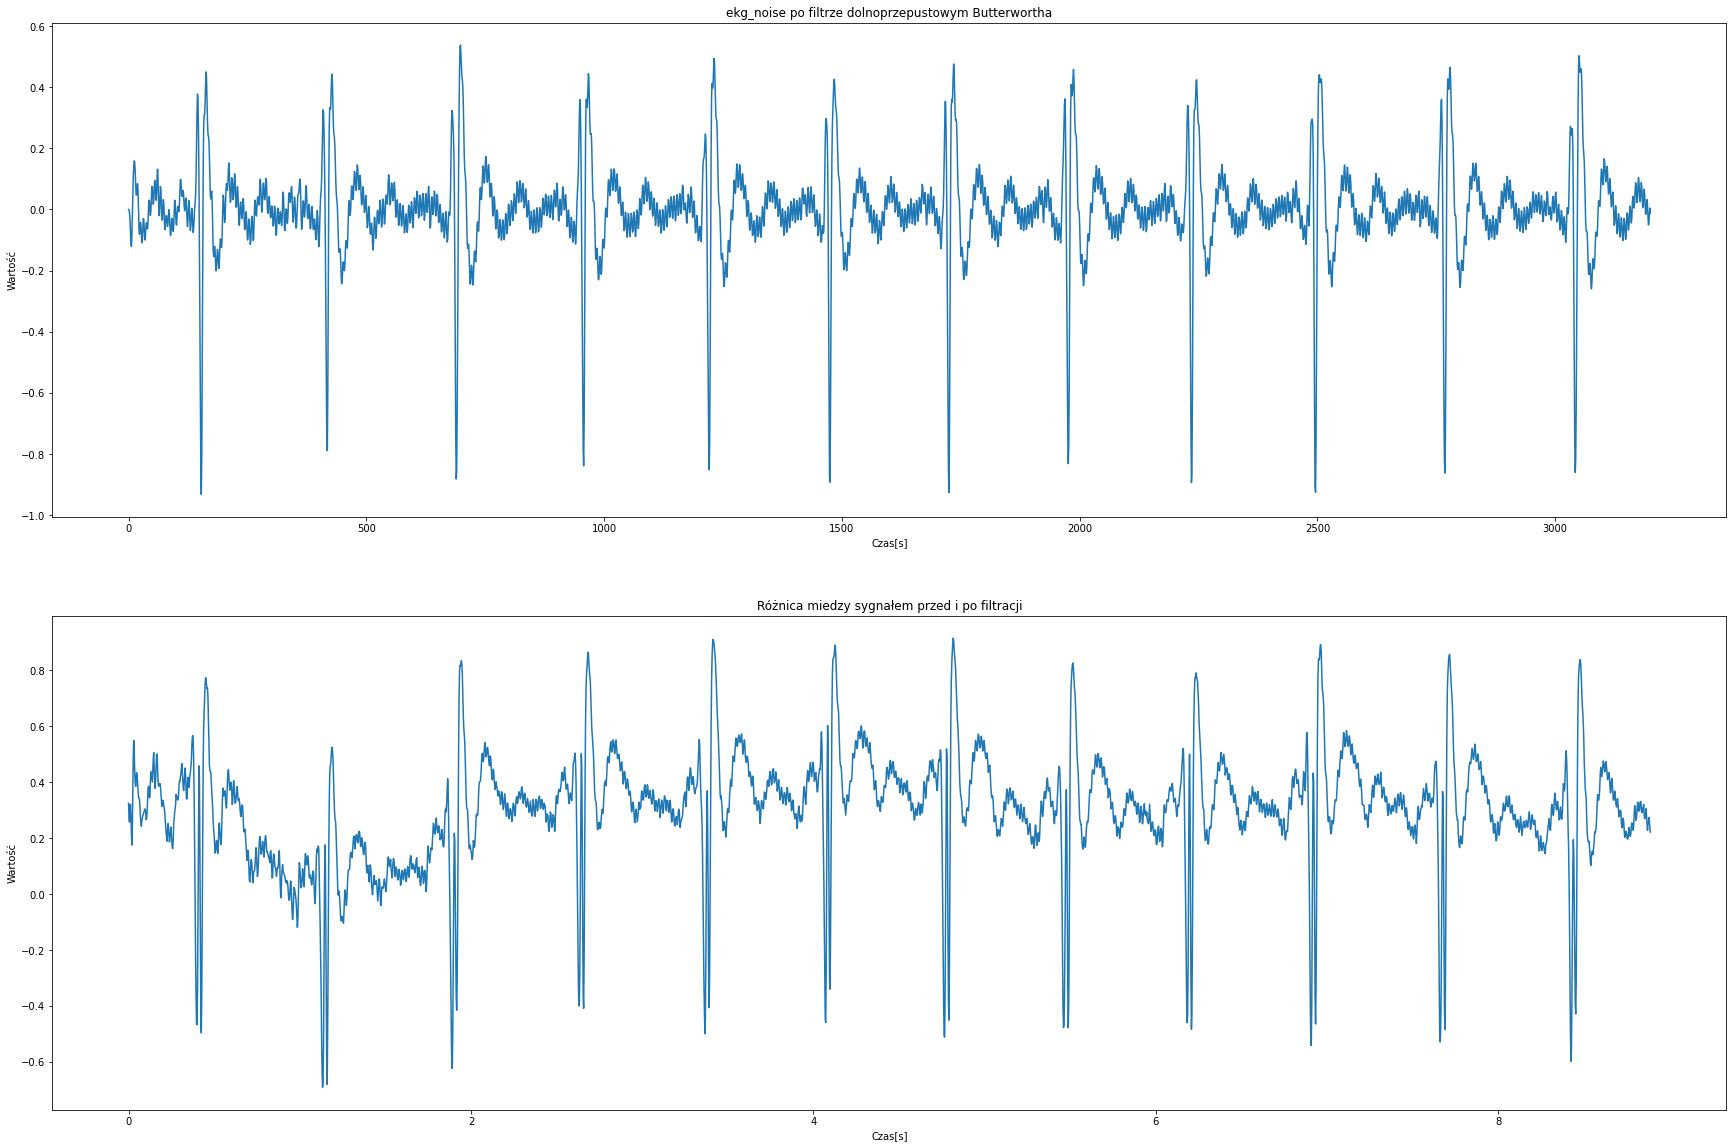

In [7]:
cutoff_frequency = 5 # ustawienie częstotliwości granicznej 

butterworth  = sig.butter(8, cutoff_frequency, 'high', fs = sampling_frequency_ekg_noise, output = 'sos') # filtr Butterwortha
filtered_sig_2 = sig.sosfilt(butterworth, filtered_sig) # przefiltrowanie sekwencji danych używając filtra IIR

plt.figure(figsize=(30,20))

plt.subplot(2, 1, 1)  # wyrysowanie wykresu
plt.plot(filtered_sig_2)
plt.title('ekg_noise po filtrze dolnoprzepustowym Butterwortha')
plt.xlabel('Czas[s]')
plt.ylabel('Wartość')

plt.subplot(2, 1, 2)  # wyrysowanie wykresu
plt.plot(filtered_sig_2 - ekg_noise['Wartość amplitudy'])
plt.title('Różnica miedzy sygnałem przed i po filtracji')
plt.xlabel('Czas[s]')
plt.ylabel('Wartość')
plt.show()

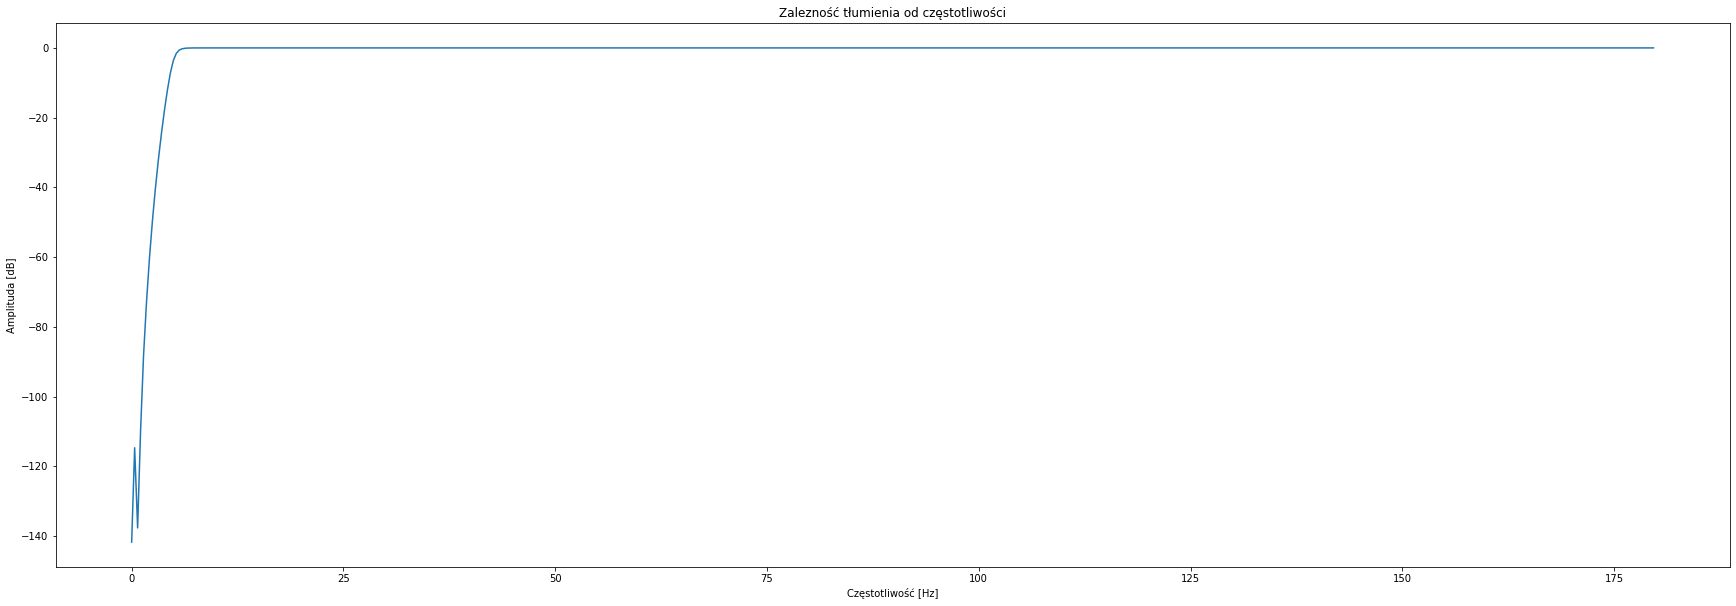

In [8]:
b,a = sig.butter(8,cutoff_frequency/(sampling_frequency_ekg_noise/2), 'high') # filtr Butterwortha
w,h = sig.freqz(b,a) # charakterystyka częstotliwościowa filtra
x = w*sampling_frequency_ekg_noise / (2*np.pi)
y = 20*np.log10(abs(h))

plt.figure(figsize=(30,10))

plt.subplot(1, 1, 1) # wyrysowanie wykresu
plt.plot(x,y)
plt.title('Zalezność tłumienia od częstotliwości')
plt.xlabel('Częstotliwość [Hz]')
plt.ylabel('Amplituda [dB]')
plt.show()

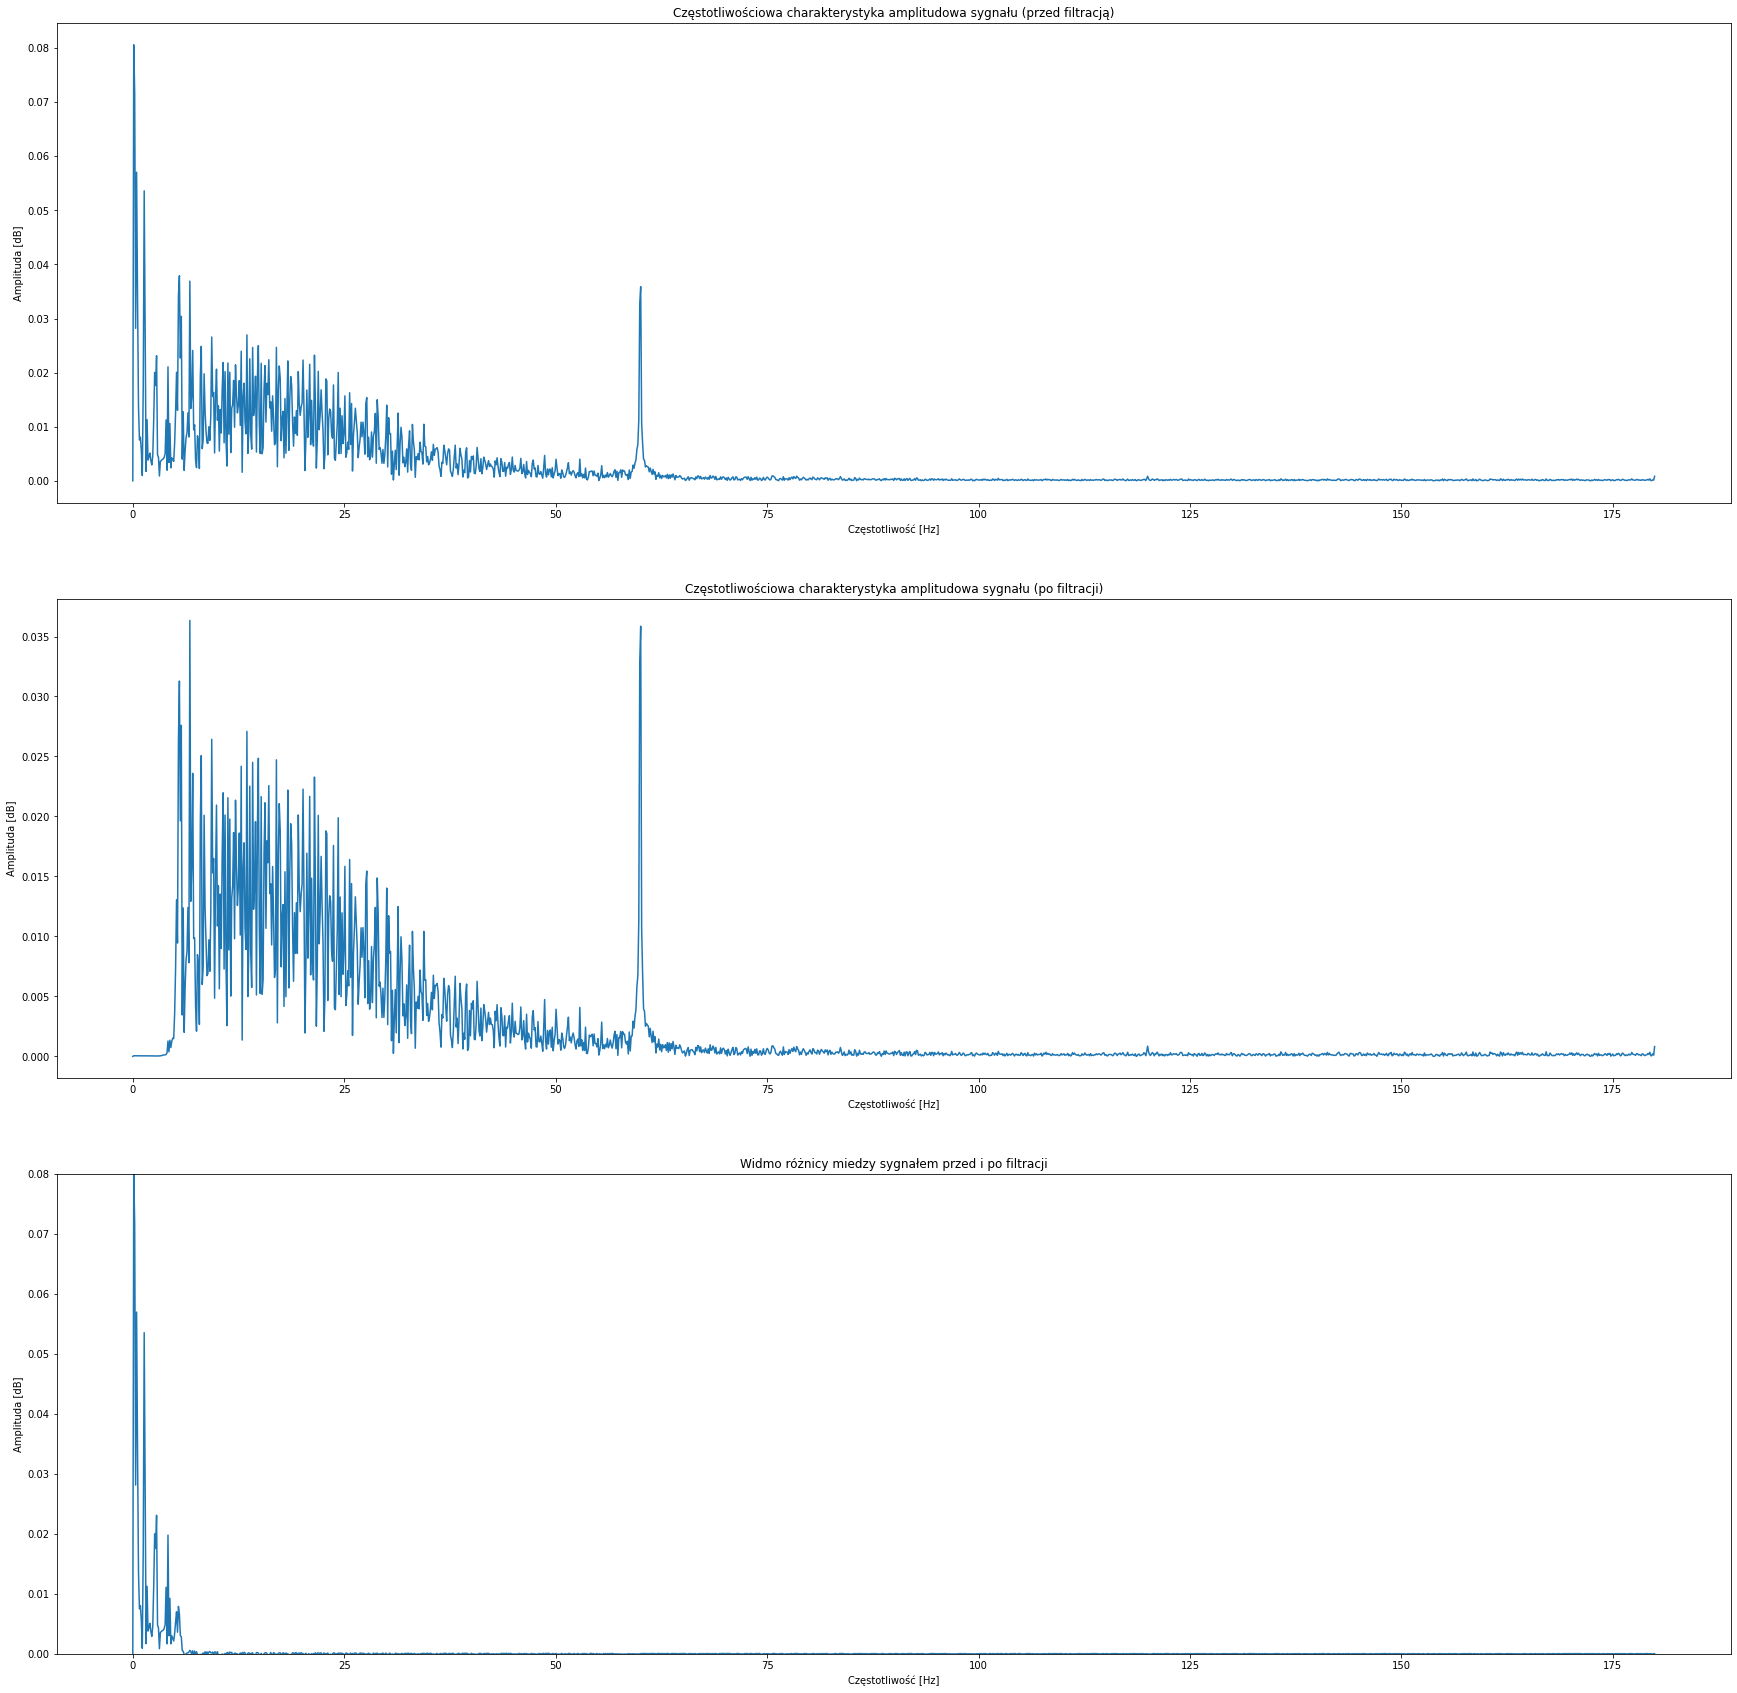

In [9]:
spectrum_5 = sig.filtfilt(b,a, ekg_noise['Wartość amplitudy']) - sig.filtfilt(b,a, ekg_noise['Wartość amplitudy']).mean() # filtr cyfrowy od przodu i od tyłu sygnału
spectrum_5 = np.abs(np.fft.rfft(spectrum_5))/(ekg_noise.size//2)

plt.figure(figsize=(30,30))

plt.subplot(3, 1, 1) # wyrysowanie wykresu
plt.plot(frequency,spectrum)
plt.title('Częstotliwościowa charakterystyka amplitudowa sygnału (przed filtracją)')
plt.xlabel('Częstotliwość [Hz]')
plt.ylabel('Amplituda [dB]')

plt.subplot(3, 1, 2) # wyrysowanie wykresu
plt.plot(frequency,spectrum_5)
plt.title('Częstotliwościowa charakterystyka amplitudowa sygnału (po filtracji)')
plt.xlabel('Częstotliwość [Hz]')
plt.ylabel('Amplituda [dB]')

plt.subplot(3, 1, 3) # wyrysowanie wykresu
plt.plot(frequency,spectrum - spectrum_5)
plt.ylim([0,0.08])
plt.title('Widmo różnicy miedzy sygnałem przed i po filtracji')
plt.xlabel('Częstotliwość [Hz]')
plt.ylabel('Amplituda [dB]')
plt.show()